# Vehicle Insurance Claim Fraud Detection
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [2]:
# Read Data
vic = pd.read_csv('Datasets/fraud_oracle.csv')
vic.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
vic.shape

(15420, 33)

In [4]:
vic.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


This dataset has 9 numerical features

In [5]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
# Checking Data for find missing value
vic.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [8]:
vic.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [9]:
vic.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

#### FraudFound_P Analysis

In [36]:
vic['FraudFound_P']

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

In [37]:
vic['FraudFound_P'].describe()

count    15420.000000
mean         0.059857
std          0.237230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FraudFound_P, dtype: float64

In [38]:
vic['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [43]:
print('Percentage of 0 (No Fraud Claim) is', round(vic['FraudFound_P'].value_counts()[0] / vic.shape[0] * 100, 5))
print('Percentage of 1 (Fraud Claim) is', round(vic['FraudFound_P'].value_counts()[1] / vic.shape[0] * 100, 5))

Percentage of 0 (No Fraud Claim) is 94.01427
Percentage of 1 (Fraud Claim) is 5.98573


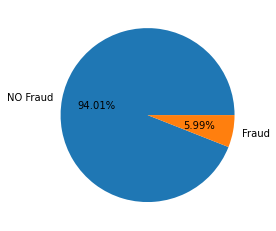

In [44]:
labels = ['NO Fraud','Fraud']
plt.pie(vic['FraudFound_P'].value_counts().values, labels=labels, autopct='%1.2f%%')
plt.show()

#### Month Analysis

In [45]:
vic['Month']

0        Dec
1        Jan
2        Oct
3        Jun
4        Jan
        ... 
15415    Nov
15416    Nov
15417    Nov
15418    Dec
15419    Dec
Name: Month, Length: 15420, dtype: object

In [46]:
vic.Month.describe()

count     15420
unique       12
top         Jan
freq       1411
Name: Month, dtype: object

In [47]:
month = pd.DataFrame(vic.groupby(['Month']).size()).reset_index()
month = month.rename(columns={0: 'NumberOfAccidents'})
month

,Month,NumberOfAccidents
0,Apr,1280
1,Aug,1127
2,Dec,1285
3,Feb,1266
4,Jan,1411
5,Jul,1257
6,Jun,1321
7,Mar,1360
8,May,1367
9,Nov,1201


In [48]:
sorted_month = month.sort_values(by=['NumberOfAccidents'], ascending=False)
sorted_month

,Month,NumberOfAccidents
4,Jan,1411
8,May,1367
7,Mar,1360
6,Jun,1321
10,Oct,1305
2,Dec,1285
0,Apr,1280
3,Feb,1266
5,Jul,1257
11,Sep,1240


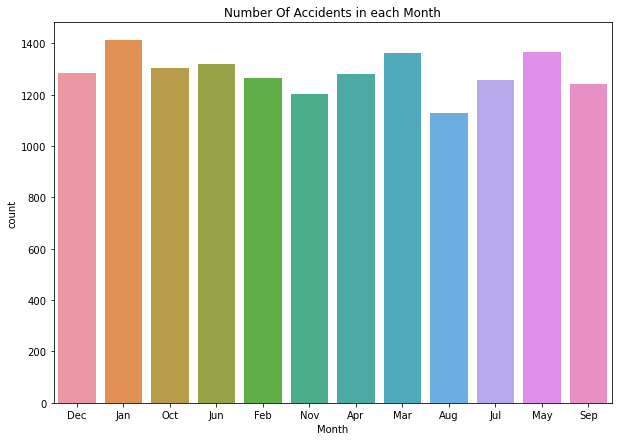

In [49]:
plt.figure(figsize=(10, 7))
sns.countplot(x=vic['Month'])
plt.title('Number Of Accidents in each Month')
plt.show()

In [52]:
month_fraud = vic[['Month', 'FraudFound_P']]
month_fraud

,Month,FraudFound_P
0,Dec,0
1,Jan,0
2,Oct,0
3,Jun,0
4,Jan,0
...,...,...
15415,Nov,1
15416,Nov,0
15417,Nov,1
15418,Dec,0


In [53]:
month_fraud = month_fraud.groupby(['Month', 'FraudFound_P']).size().reset_index().rename(columns={0: 'NumberOfAccidents'})
month_fraud

,Month,FraudFound_P,NumberOfAccidents
0,Apr,0,1200
1,Apr,1,80
2,Aug,0,1043
3,Aug,1,84
4,Dec,0,1223
5,Dec,1,62
6,Feb,0,1184
7,Feb,1,82
8,Jan,0,1324
9,Jan,1,87


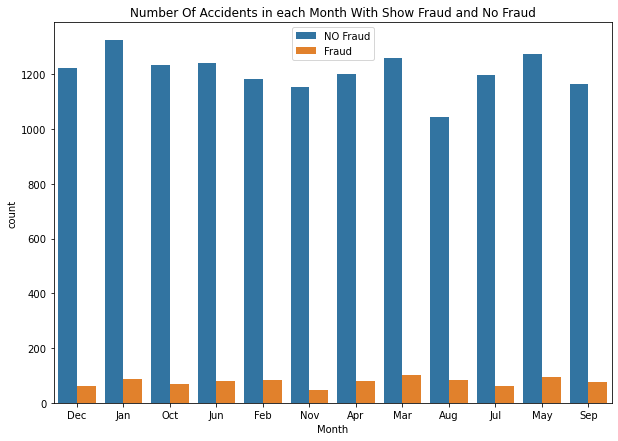

In [59]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['Month'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Month With Show Fraud and No Fraud')
plt.show()

### Conclusion for Month Analysis
The amount of claims in different months does not differ so much that we can find out a special point from it.
1. January: 1411 number of claims (Highest)
2. August: 1127 number of claims (Lowest)